In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
data = pd.read_csv("/Users/omgajipara/Desktop/Data Science/AI:ML/Machine Learning/Supervised Learning/Classification/DecisionTree/DesicionTree.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [40]:
x = data.drop(['Purchased', 'User ID','Gender'], axis=1)
y=data['Purchased']

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

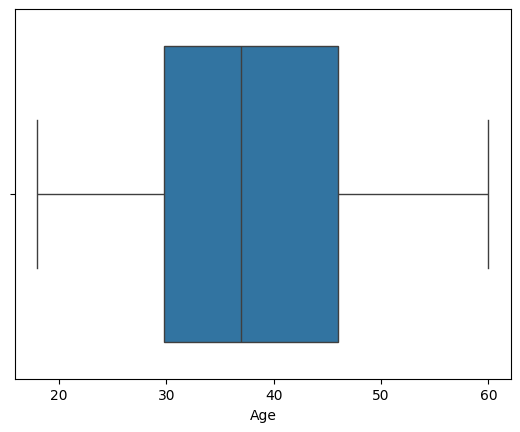

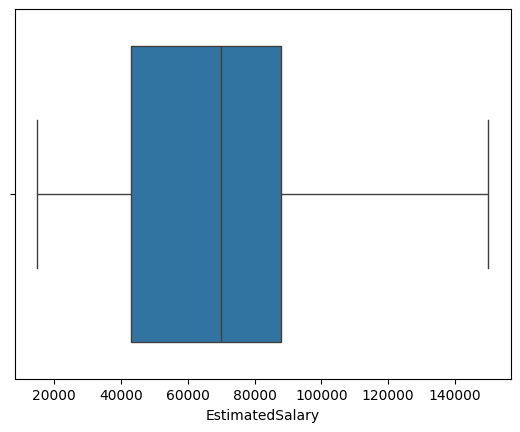

In [41]:
for i in x:
    sns.boxplot(x=i,data=data)
    plt.show()

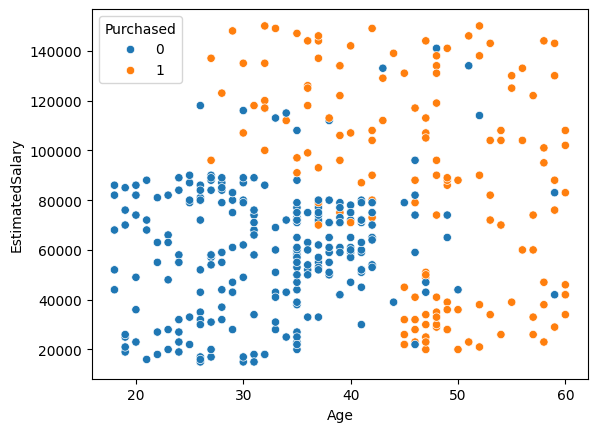

In [42]:
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=data)
plt.savefig('assets/SVMClassifier1.jpg')
plt.show()

In [43]:
from mlxtend.plotting import plot_decision_regions

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np

best_score = 0
best_state = 0
best_depth = 0
min_diff = float('inf')

# Loop through all random states
for state in range(0, 101):
    X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=state)

    for depth in range(1, 21):
        model = SVC(random_state=state,kernel='rbf')
        model.fit(X_train, y_train)

        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)
        diff = abs(train_acc - test_acc)

        # Choose only if test_acc is high and train-test diff is low
        if test_acc > best_score or (test_acc == best_score and diff < min_diff):
            best_score = test_acc
            best_state = state
            min_diff = diff

# Final output
print("✅ Best Random State:", best_state)
print(f"✅ Best Test Accuracy: {best_score*100:.2f}%")
print(f"✅ Min Train-Test Accuracy Diff: {min_diff:.4f}")


✅ Best Random State: 24
✅ Best Test Accuracy: 97.50%
✅ Min Train-Test Accuracy Diff: 0.0781


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=24)

In [46]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [47]:
svm.score(x_test,y_test)*100

97.5

In [48]:
inp=pd.DataFrame([[19,19000]])
x_scaledinp=scaler.transform(inp)
svm.predict(x_scaledinp)

/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

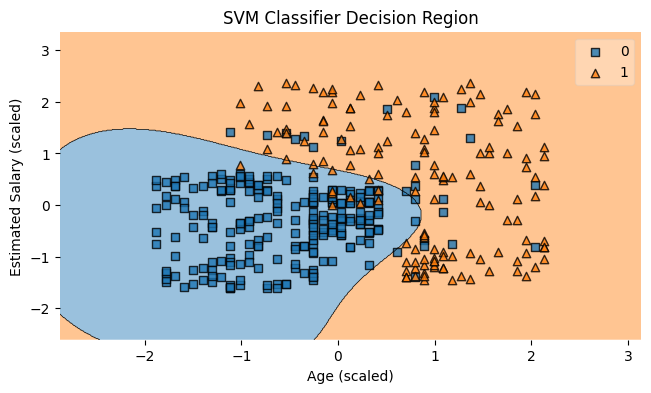

In [49]:
plt.figure(figsize=(7.5, 4))
plot_decision_regions(x_scaled, y.to_numpy().astype(np.int_), clf=svm)
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.title("SVM Classifier Decision Region")
plt.savefig('assets/SVMClassifier.jpg')
plt.show()
